In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

folder = ['200mW', '400mW', '800mW', '1800mW']

In [21]:
def get_csv(f):
    path = r'D:\desktop\NTU/樣本資料\140523-2\tuning\%s' % f
    os.chdir(path)
    data = os.listdir()
    sp = {}
    wavelength = []
    for file in data:
        a = pd.read_csv(file)[26:].drop('Unnamed: 2', axis = 1)
        a.columns = ['w', 'v']
        a = pd.DataFrame(a, dtype = np.float64)
        pk = a['v'].idxmax() # peak所在index
        sp[a['w'][pk]] = a # dic
        wavelength.append(a['w'][pk])
    wavelength.sort()
    return sp, wavelength

def dBm(v):
    return 10* np.log10(abs(v))   
def nor(v):
    return v/np.max(v)

def cluster(data, maxgap):
    data.sort()
    groups = [[data[0]]]
    for x in data[1:]:
        if abs(x - groups[-1][-1]) <= maxgap:
            groups[-1].append(x)
        else:
            groups.append([x])
    return groups

def draw_nor(sp, wavelength, gap):
    gp = cluster(wavelength, gap)
    plt.figure()
    
    for i in gp:
        plt.plot(sp[i[0]]['w'], nor(sp[i[0]]['v']), 'b-' , linewidth = 1)
        plt.plot(sp[i[-1]]['w'], nor(sp[i[-1]]['v']), 'b-', linewidth = 1)
        b = np.linspace(i[0], i[-1])
        b1 = np.ones(len(b))
        b0 = np.zeros(len(b))
        plt.plot(b, b1, 'b-', linewidth = 1)
        plt.fill_between(b, b0, b1, facecolor = 'r', alpha = 0.3)

    plt.xlim(1380, 1485)
    plt.ylim(-0.05, 1.05)

    ax = plt.gca()
    sp = ['right', 'left', 'top', 'bottom']
    for i in sp:
        ax.spines[i].set_color('black')
        ax.spines[i].set_linewidth(2)
    ax.tick_params(axis = "y", direction = "in")
    ax.tick_params(axis = "x", direction = "in")
    
    plt.show()

def max_hold(f):
    path = r'D:\desktop\NTU/樣本資料\140523-2\tuning\%s' % f
    os.chdir(path)
    data = os.listdir()
    value = {}
    wave_x = []
    wavelength = []
    for file in data:
        a = pd.read_csv(file)[26:].drop('Unnamed: 2', axis = 1)
        a.columns = ['w', 'v']
        a = pd.DataFrame(a, dtype = np.float64)
        pk = a['v'].idxmax() # the peak index
        pk_wave = a['w'][pk]
        wavelength.append(pk_wave)
        value[pk_wave] = a['v']
        wave_x = a['w']
    df = pd.DataFrame(value)
    df = df.max(axis = 1)
    # find the bandwidth
    wavelength.sort()
    left = value[wavelength[0]]
    right = value[wavelength[-1]]
    return wave_x, df, [wavelength[0], left], [wavelength[-1], right]

def drow_dBm(x, y, left, right):
    plt.figure()
    plt.plot(x, dBm(y), color = 'black', linestyle = ':', linewidth = 1.7)
    plt.plot(x, dBm(left[-1]), 'r--')
    plt.plot(x, dBm(right[-1]), 'b')
    ax = plt.gca()
    sp = ['right', 'left', 'top', 'bottom']
    for i in sp:
        ax.spines[i].set_color('black')
        ax.spines[i].set_linewidth(2)
    ax.tick_params(axis = "y", direction = "in")
    ax.tick_params(axis = "x", direction = "in")
    plt.legend(['tuning spectrum','%s nm' % left[0], '%s nm' % right[0]])
    plt.xlim(1380, 1485)
    plt.ylim(-57, 0)
    plt.xlabel('Wavelength (nm)', fontsize = 14)
    plt.ylabel('Power (dBm)', fontsize = 14)
    plt.show()

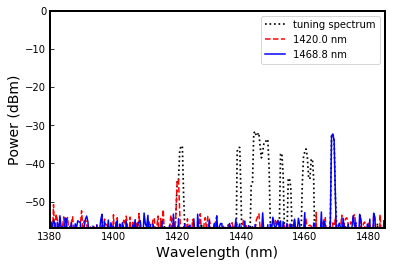

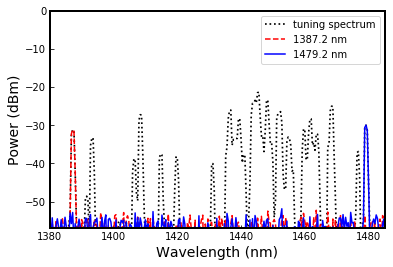

C:\Users\Lomny\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


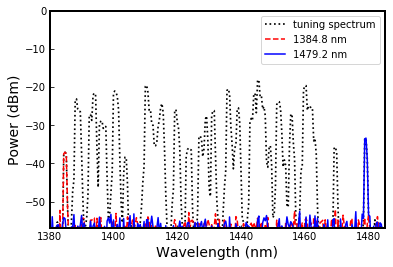

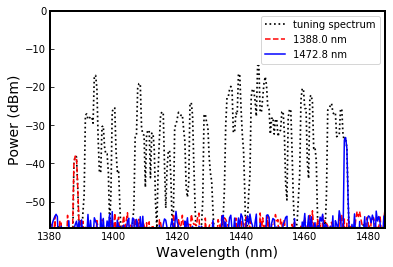

In [20]:
for i in folder:
    x, y, l, r = max_hold(i)
    drow_dBm(x, y, l, r)

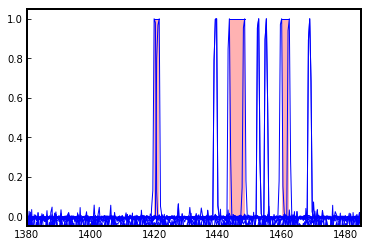

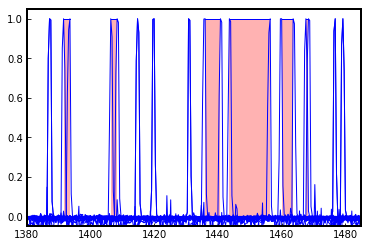

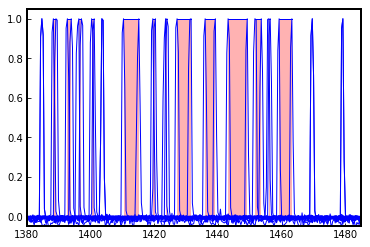

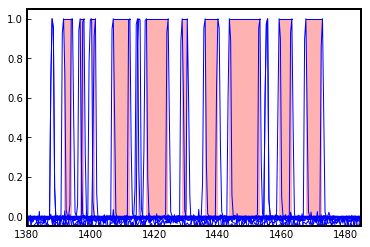

In [9]:
for i in folder:
    sp, wavelength = get_csv(i)
    draw_nor(sp, wavelength, 2.2)